<a href="https://colab.research.google.com/github/jrgosalvez/data255_DL/blob/main/Lab1/Part_1_DL_255_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SJSU MSDS 255 DL, Spring 2024
#### Lab 1 - Part 1; Team 9

Hi Anbu. I've started Part 1 by copying in the Kaggle example and datasets. We need to update three parts:
1. the depth and width of nodes
2. that training should be on ALL features for users & items, not just IDs
3. Split data 80/20

## Recommendation System

In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Check Directory and Map to Google Drive

In [2]:
# confirm drive diretory, should be /content to navigate Drive to files on Drive
!pwd

/content


In [3]:
!ls /content/drive/Shareddrives/DATA_255_DL/Lab_1/Part1_DL_ItemBasedRecommendation/BookCrossingData

BX-Book-Ratings.csv  BX-Books.csv  BX-Users.csv


### Load Libraries

In [4]:
# Basic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# System
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

### Check files

In [5]:
for dirname, _, filenames in os.walk('/content/drive/Shareddrives/DATA_255_DL/Lab_1/Part1_DL_ItemBasedRecommendation/BookCrossingData'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/Shareddrives/DATA_255_DL/Lab_1/Part1_DL_ItemBasedRecommendation/BookCrossingData/BX-Book-Ratings.csv
/content/drive/Shareddrives/DATA_255_DL/Lab_1/Part1_DL_ItemBasedRecommendation/BookCrossingData/BX-Books.csv
/content/drive/Shareddrives/DATA_255_DL/Lab_1/Part1_DL_ItemBasedRecommendation/BookCrossingData/BX-Users.csv


### Load Data

NOTE: Kaggle describes encoding as latin-1, which is ISO-8859-1

In [6]:
users = pd.read_csv('/content/drive/Shareddrives/DATA_255_DL/Lab_1/Part1_DL_ItemBasedRecommendation/BookCrossingData/BX-Users.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')

In [7]:
books = pd.read_csv('/content/drive/Shareddrives/DATA_255_DL/Lab_1/Part1_DL_ItemBasedRecommendation/BookCrossingData/BX-Books.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9



In [8]:
ratings = pd.read_csv('/content/drive/Shareddrives/DATA_255_DL/Lab_1/Part1_DL_ItemBasedRecommendation/BookCrossingData/BX-Book-Ratings.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')

### Explore Data

In [9]:
print(users.shape)
print(books.shape)
print(ratings.shape)

(278858, 3)
(271360, 8)
(1149780, 3)


In [10]:
print(users.columns)
print(books.columns)
print(ratings.columns)

Index(['User-ID', 'Location', 'Age'], dtype='object')
Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


### Join Data

In [11]:
data = pd.merge(ratings, users, on='User-ID', how='inner')

In [12]:
data = pd.merge(data, books, on='ISBN', how='inner')

In [13]:
data.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [14]:
data.shape

(1031136, 12)

In [15]:
print('Size of the dataset is: ', data.memory_usage().sum() / 1024**2, ' MB')

Size of the dataset is:  102.270263671875  MB


In [16]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [17]:
print('Number of books: ', data['ISBN'].nunique())
print('Number of users: ',data['User-ID'].nunique())

Number of books:  270151
Number of users:  92106


In [18]:
print('Missing data [%]')
round(data.isnull().sum() / len(data) * 100, 4)

Missing data [%]


User-ID                 0.0000
ISBN                    0.0000
Book-Rating             0.0000
Location                0.0000
Age                    26.9446
Book-Title              0.0000
Book-Author             0.0001
Year-Of-Publication     0.0000
Publisher               0.0002
Image-URL-S             0.0000
Image-URL-M             0.0000
Image-URL-L             0.0004
dtype: float64

<Axes: xlabel='Age'>

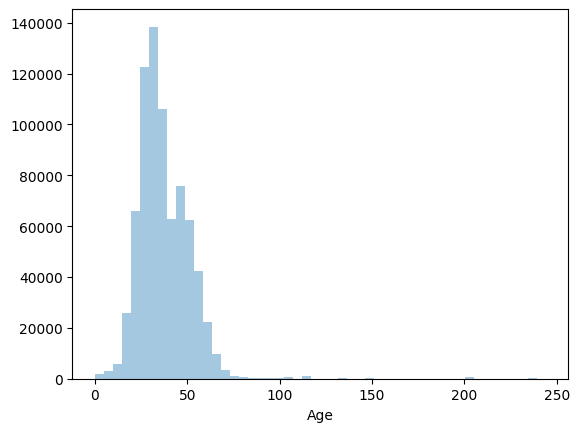

In [19]:
sns.distplot(data['Age'].dropna(), kde=False)

In [20]:
print('Number of outliers: ', sum(data['Age'] > 100))

Number of outliers:  2910


In [21]:
#data['Book-Rating'] = data['Book-Rating'].replace(0, None)

<Axes: xlabel='Book-Rating', ylabel='count'>

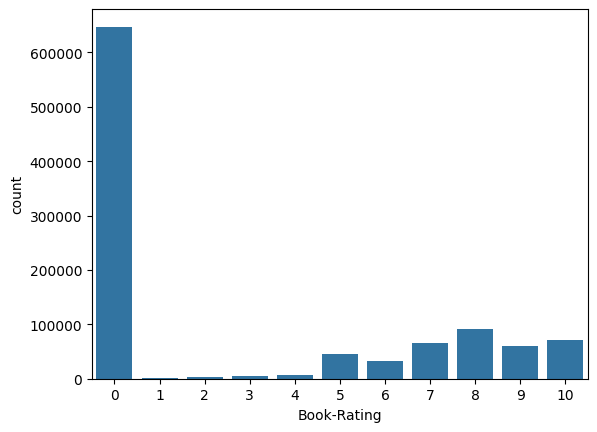

In [22]:
sns.countplot(x='Book-Rating', data=data)

In [24]:
print('Average book rating: ', round(data['Book-Rating'].mean(), 2))

Average book rating:  2.84


In [23]:
country = data['Location'].apply(lambda row: str(row).split(',')[-1])
data.groupby(country)['Book-Rating'].count().sort_values(ascending=False).head(10)

Location
 usa               746466
 canada             93000
 united kingdom     33072
 germany            27657
                    24259
 australia          18238
 spain              14968
 n/a                11177
 france             10639
 portugal            6980
Name: Book-Rating, dtype: int64

### Feature Engineering

In [25]:
# Cast to numeric
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'], 'coerce').fillna(2099, downcast = 'infer')

In [26]:
data['Book-Rating'] = data['Book-Rating'].replace(0, None)

In [27]:
data['Age'] = np.where(data['Age']>90, None, data['Age'])

In [28]:
data[['Book-Author', 'Publisher']] = data[['Book-Author', 'Publisher']].fillna('Unknown')

In [29]:
# Age
median = data["Age"].median()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
rand_age = np.random.randint(median - std, median + std, size = is_null)
age_slice = data["Age"].copy()
age_slice[pd.isnull(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)

### Prep Data

In [30]:
df = data

In [31]:
# Relevant score
df = df[df['Book-Rating'] >= 6]

In [32]:
# Check
df.groupby('ISBN')['User-ID'].count().describe()

count    129014.000000
mean          2.495047
std           7.023557
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         663.000000
Name: User-ID, dtype: float64

In [33]:
df = df.groupby('ISBN').filter(lambda x: len(x) >= 5)

In [34]:
df.groupby('User-ID')['ISBN'].count().describe()

count    41859.000000
mean         3.765642
std         16.091125
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       2450.000000
Name: ISBN, dtype: float64

In [35]:
df = df.groupby('User-ID').filter(lambda x: len(x) >= 5)

In [36]:
df.shape

(105350, 12)

### Recommendation

In [37]:
df_p = df.pivot_table(index='ISBN', columns='User-ID', values='Book-Rating')

In [38]:
df_p.columns

Int64Index([   114,    242,    243,    244,    254,    388,    503,    505,
               507,    638,
            ...
            278356, 278390, 278418, 278522, 278535, 278554, 278582, 278633,
            278694, 278843],
           dtype='int64', name='User-ID', length=6310)

In [39]:
# Select users who liked LOTR
lotr = df_p.loc['0345339703'] # Lord of the Rings Part 1
like_lotr = lotr[lotr == 10].to_frame().reset_index()
users = like_lotr['User-ID'].to_frame()

In [40]:
# Trim original dataset
liked = pd.merge(users, df, on='User-ID', how='inner')

In [41]:
rating_count = liked.groupby('ISBN')['Book-Rating'].count().to_frame()
rating_mean  = liked.groupby('ISBN')['Book-Rating'].mean().to_frame()

In [42]:
rating_count.rename(columns={'Book-Rating':'Rating-Count'}, inplace=True)
rating_mean.rename(columns={'Book-Rating':'Rating-Mean'}, inplace=True)

In [43]:
liked = pd.merge(liked, rating_count, on='ISBN', how='inner')

In [44]:
liked = pd.merge(liked, rating_mean, on='ISBN', how='inner')

In [45]:
liked['Rating-Mean'] = liked['Rating-Mean'].round(2)

<Axes: >

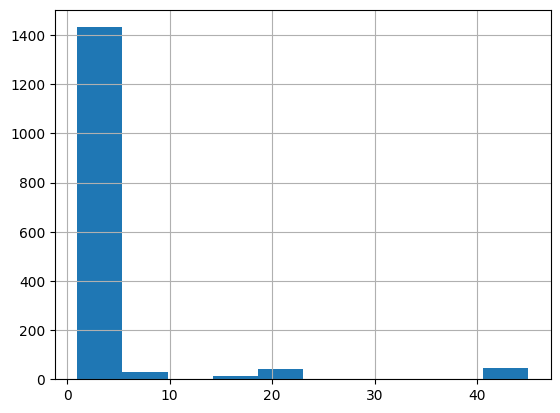

In [46]:
liked['Rating-Count'].hist()

In [47]:
C = liked['Rating-Mean'].mean()
C

8.89911238825032

In [48]:
m = rating_count.quantile(.995)[0] # .9
m

6.0

In [49]:
# IMDB formula; source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page---------------------------
def weighted_rating(x, m=m, C=C):
    v = x['Rating-Count']
    R = x['Rating-Mean']

    return (v/(v+m) * R) + (m/(m+v) * C)

In [50]:
# Create relevant sub-dataset
liked_q = liked.copy().loc[liked['Rating-Count'] >= m]
liked_q.shape

(134, 14)

In [51]:
liked_q['Score'] = liked_q.apply(weighted_rating, axis=1)

### Get Top 10 Best Rated Books

In [52]:
top_r = liked_q[['Book-Title', 'Rating-Mean']]

In [53]:
top_r = top_r.groupby(['Book-Title'])['Rating-Mean'].mean().to_frame()

In [54]:
top_r.sort_values(by='Rating-Mean', ascending=False).head(10)

,Rating-Mean
Book-Title,
"The Fellowship of the Ring (The Lord of the Rings, Part 1)",10.00
"The Return of the King (The Lord of the Rings, Part 3)",10.00
The Hobbit : The Enchanting Prelude to The Lord of the Rings,9.93
"The Two Towers (The Lord of the Rings, Part 2)",9.81
Ender's Game (Ender Wiggins Saga (Paperback)),9.67
Harry Potter and the Goblet of Fire (Book 4),9.67
Harry Potter and the Order of the Phoenix (Book 5),9.67
Harry Potter and the Chamber of Secrets (Book 2),9.29
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),9.17


### Most Popular

In [55]:
top_p = liked[['Book-Title', 'Rating-Count']]

In [56]:
top_p = top_p.groupby(['Book-Title'])['Rating-Count'].mean().to_frame()

In [57]:
top_p.sort_values(by='Rating-Count', ascending=False).head(10)#.plot(kind='barh')

,Rating-Count
Book-Title,
"The Fellowship of the Ring (The Lord of the Rings, Part 1)",45.000000
"The Return of the King (The Lord of the Rings, Part 3)",22.000000
"The Two Towers (The Lord of the Rings, Part 2)",20.090909
The Hobbit : The Enchanting Prelude to The Lord of the Rings,15.000000
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),6.000000
Ender's Game (Ender Wiggins Saga (Paperback)),6.000000
Harry Potter and the Order of the Phoenix (Book 5),6.000000
Harry Potter and the Chamber of Secrets (Book 2),5.800000
Harry Potter and the Goblet of Fire (Book 4),5.000000


# Configure Wide and Deep

### Embedings

In [58]:
from tqdm import tqdm
from gensim.models import Word2Vec
import random

# Ensure trains on all user adn item features, NOT JUST User-ID!!!

In [59]:
users = df["User-ID"].unique().tolist()
len(users)

6310

# Ensure 80/20 train-test split

In [60]:
# shuffle users ID's
random.shuffle(users)

# extract 90% of customer ID's
users_train = [users[i] for i in range(round(0.9*len(users)))]

# split data into train and validation set
train_df = df[df['User-ID'].isin(users_train)]
validation_df = df[~df['User-ID'].isin(users_train)]

In [61]:
# list to capture purchase history of the customers
reads_train = []

# populate the list with the product codes
for i in tqdm(users_train):
    temp = train_df[train_df["User-ID"] == i]["ISBN"].tolist()
    reads_train.append(temp)

100%|██████████| 5679/5679 [00:04<00:00, 1379.62it/s]


In [62]:
# list to capture purchase history of the customers
reads_val = []

# populate the list with the product codes
for i in tqdm(validation_df['User-ID'].unique()):
    temp = validation_df[validation_df["User-ID"] == i]["ISBN"].tolist()
    reads_val.append(temp)

100%|██████████| 631/631 [00:00<00:00, 2320.44it/s]


In [63]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(reads_train, progress_per=200)

model.train(reads_train, total_examples = model.corpus_count,
            epochs=10, report_delay=1)

(806138, 951810)

In [64]:
model.init_sims(replace=True)

In [65]:
print(model)

Word2Vec<vocab=6674, vector_size=100, alpha=0.03>


In [66]:
# extract all vectors
X = model.wv.vectors

X.shape

(6674, 100)

# Umap not working, remove... not required

In [67]:
#!pip install umap

In [68]:
#!pip install umap-learn

In [69]:
'''import umap

cluster_embedding = UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')'''

"import umap\n\ncluster_embedding = UMAP(n_neighbors=30, min_dist=0.0,\n                              n_components=2, random_state=42).fit_transform(X)\n\nplt.figure(figsize=(10,9))\nplt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')"

In [70]:
books = train_df[["ISBN", "Book-Title"]]

# remove duplicates
books.drop_duplicates(inplace=True, subset='ISBN', keep="last")

# create product-ID and product-description dictionary
books_dict = books.groupby('ISBN')['Book-Title'].apply(list).to_dict()

### Get recommendation based on trained model

In [71]:
# Find LOTR
df[df['Book-Title'].str.contains('Lord of the Rings')].sample()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
648665,47050,0842355715,10,"cottonwood, california, usa",55,Finding God in the Lord of the Rings,Kurt D. Bruner,2001,Tyndale House Publishers,http://images.amazon.com/images/P/0842355715.0...,http://images.amazon.com/images/P/0842355715.0...,http://images.amazon.com/images/P/0842355715.0...


In [72]:
# Check
books_dict['0345339703']

['The Fellowship of the Ring (The Lord of the Rings, Part 1)']

In [73]:
def similar_books(v, n = 15):

    # extract most similar products for the input vector
    ms = model.wv.similar_by_vector(v, topn= n+1)[1:]

    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (books_dict[j[0]][0], j[1])
        new_ms.append(pair)

    return new_ms

In [74]:
# Recommend
similar_books(model.wv['0345339703'])

[('The Two Towers (The Lord of the Rings, Part 2)', 0.943714439868927),
 ('The Return of the King (The Lord of the Rings, Part 3)', 0.882835328578949),
 ('The Hobbit : The Enchanting Prelude to The Lord of the Rings',
  0.8280236124992371),
 ('The Velveteen Rabbit', 0.822080135345459),
 ('The Silmarillion', 0.8212078213691711),
 ('Anne of Windy Poplars (Anne of Green Gables Novels (Paperback))',
  0.8208832740783691),
 ('Dark Tide I: Onslaught (Star Wars: The New Jedi Order, Book 2)',
  0.8177062273025513),
 ('Cetaganda (Bujold, Lois Mcmaster. Vorkosigan Adventure.)',
  0.8124439120292664),
 ('Rainbow Valley (Anne of Green Gables Novels (Paperback))',
  0.8105369806289673),
 ("Plains of Passage (Earth's Children)", 0.8074008226394653),
 ('The Count of Monte Cristo (Bantam Classics)', 0.8066457509994507),
 ('The Witches (Puffin Novels)', 0.8037572503089905),
 ('Prentice Alvin (Tales of Alvin Maker, Book 3)', 0.8033804893493652),
 ('Children of the Mind (Ender Wiggins Saga (Paperback))',